<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/master/SignalProcUsingML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#t_n = 10
#N = 1000 # No. of samples
#T = t_n / N
#f_s = 1/T  # Smapling Frequency
#t_value = np.linspace(0,100,N)

fs = 1e3
fr = np.float(100.0) #Signal Ffrequency
N = 1e3
t_value = np.arange(N) / fs

a = 50 #Amplitude

x = a*np.sin(2*np.pi*fr*t_value) + a*np.cos(2*np.pi*fr*t_value) #Signal
n = 1e2*np.random.randn(len(t_value)) #Noise
xn = x + 1e2*np.random.randn(len(t_value)) # Noise+Signal

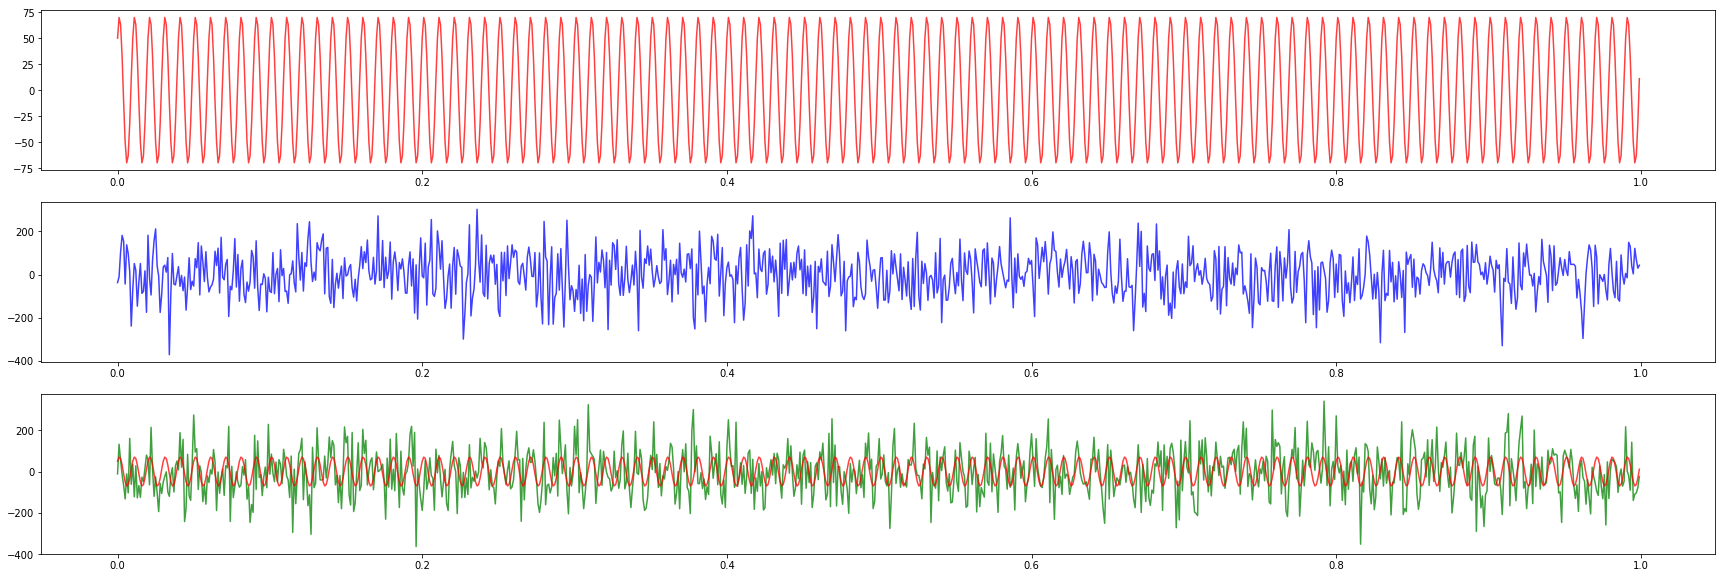

In [9]:
def plot_source(signal, noise, raw, t):
  f, (ax1, ax2, ax3) = plt.subplots(3, 1)
  f.set_figwidth(30)
  f.set_figheight(10)
  ax1.plot(t, signal, 'r' , alpha=0.75)
  ax2.plot(t, noise, 'b', alpha=0.75)
  ax3.plot(t, raw, 'g', alpha=0.75)
  ax3.plot(t, signal, 'r', alpha=0.75)
  
plot_source(x, n, xn, t_value)

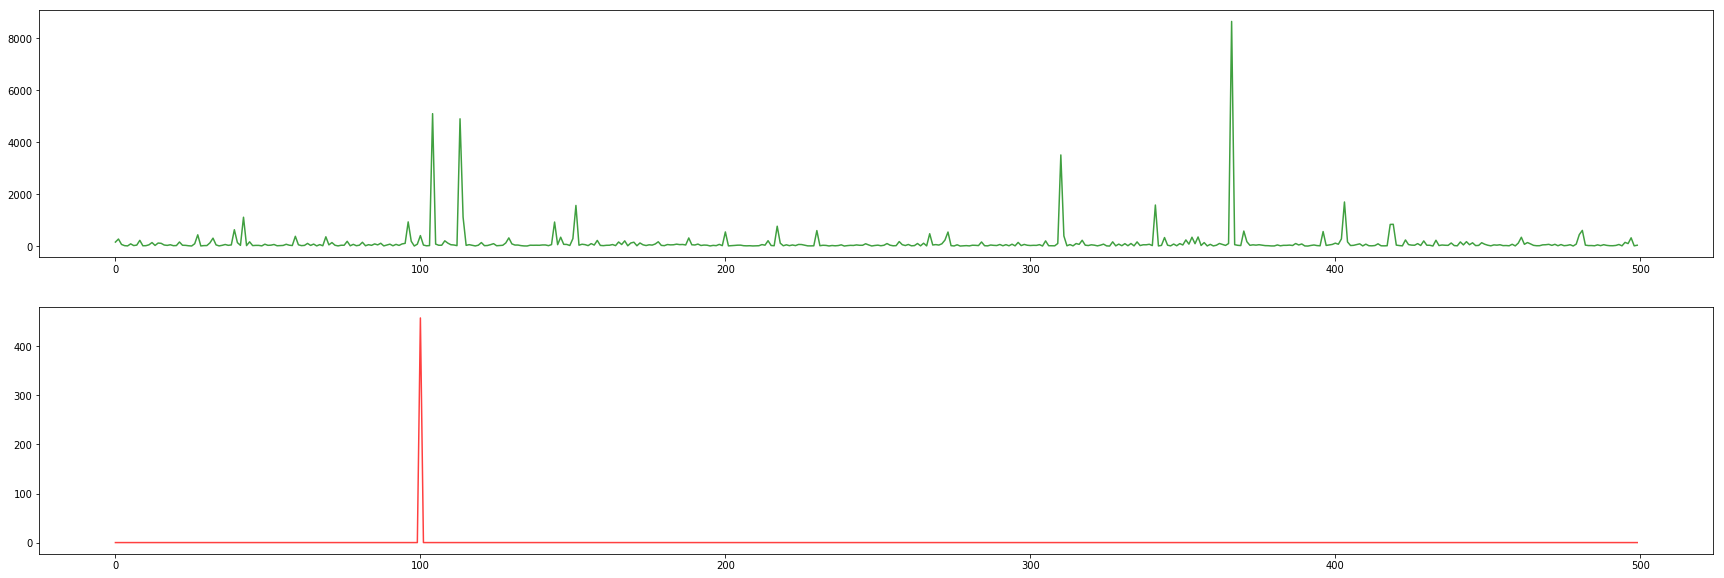

In [5]:
def get_fft_values(y_values):   
    s = len(y_values) 
    k = np.arange(s)
    T = s/fs
    frq = k/T # two sides frequency range
    f_values = frq[range(int(s/2))] # one side frequency range
    fft_values = np.fft.fft(y_values)/n # fft computing and normalization
    fft_values = fft_values[range(int(s/2))]
    return f_values, fft_values
  

 
#plt.plot(f_values, fft_values, linestyle='-', color='blue')
#plt.xlabel('Frequency [Hz]', fontsize=16)
#plt.ylabel('Amplitude', fontsize=16)
#plt.title("Frequency domain of the signal", fontsize=16)
#plt.show()

def plot_fft(signal, raw):
  freq_s,  fft_s = get_fft_values(x)
  freq_raw, fft_raw = get_fft_values(xn)
  ft, (axft1, axft2) = plt.subplots(2, 1)
  ft.set_figwidth(30)
  ft.set_figheight(10)
  axft1.plot(freq_raw, abs(fft_raw), 'g' , alpha=0.75)
  axft2.plot(freq_s, abs(fft_s), 'r', alpha=0.75)
  
plot_fft(x, xn)

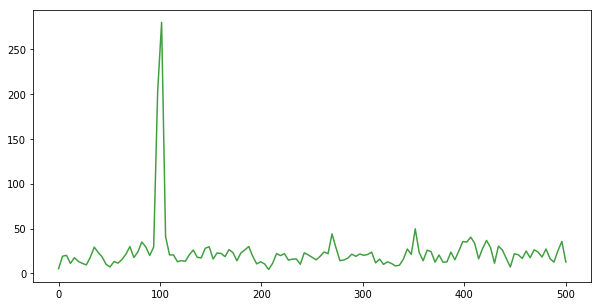

In [8]:
from scipy.signal import welch
 
def get_psd_values(y_values, fs):
    f_values, psd_values = welch(y_values, fs=fs)
    return f_values, psd_values
f_values, psd_values = get_psd_values(xn, fs)

ft, (axft1) = plt.subplots(1, 1)
ft.set_figwidth(10)
ft.set_figheight(5)
axft1.plot(f_values, psd_values, 'g' , alpha=0.75)

[(0, 0.6)]

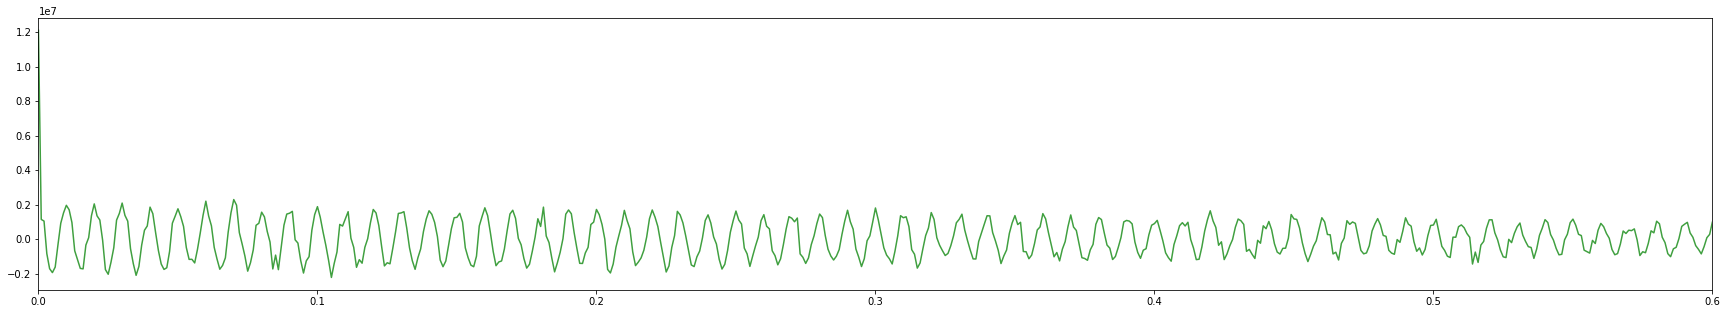

In [22]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values


t_values, autocorr_values = get_autocorr_values(xn, 0.01, 1000, fs)

ft, (axft1) = plt.subplots(1, 1)
ft.set_figwidth(30)
ft.set_figheight(5)
axft1.plot(t_value, autocorr_values, 'g' , alpha=0.75)
axft1.axes.set(xlim = (0, 0.6))